In [21]:
## Back propagation implementation - Python Deep Learning, Zocca et al

import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def tanh(x):     
    return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))

def tanh_derivative(x):     
    return (1 + tanh(x))*(1 - tanh(x))
    
class NeuralNetwork:
    #network consists of a list of integers, indicating 
    #the number of neurons in each layer
    def __init__(self, net_arch): 
        numpy.random.seed(0)                  
        self.activity = tanh         
        self.activity_derivative = tanh_derivative 
        self.layers = len(net_arch)         
        self.steps_per_epoch = 4
        self.arch = net_arch        

        self.weights = []         
        #range of weight values (-1,1)      
        for layer in range(len(net_arch) - 1):
            print(layer)
            w = 2*numpy.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1  
            print(w)
            self.weights.append(w)
        print(self.weights)
        
    def fit(self, data, labels, learning_rate=0.1, epochs=10):         
        #Add bias units to the input layer         
        ones = numpy.ones((1, data.shape[0]))        
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs*self.steps_per_epoch


        for k in range(training):             
            if k % self.steps_per_epoch == 0:                  
                #print ('epochs:', k/self.steps_per_epoch)    
                print('epochs: {}'.format(k/self.steps_per_epoch))              
                for s in data:                     
                    print(s, nn.predict(s))

            sample = numpy.random.randint(data.shape[0])            
            y = [Z[sample]] 

            for i in range(len(self.weights)-1):                     
                activation = numpy.dot(y[i], self.weights[i])                         
                activity = self.activity(activation)  
                #add the bias for the next layer                     
                activity = numpy.concatenate((numpy.ones(1), numpy.array(activity)))                      
                y.append(activity)   
             
            #last layer              
            activation = numpy.dot(y[-1], self.weights[-1])             
            activity = self.activity(activation)             
            y.append(activity)
                    
            #error for the output layer             
            error = labels[sample] - y[-1]             
            delta_vec = [error * self.activity_derivative(y[-1])] 

            #we need to begin from the back from the next to last layer
            for i in range(self.layers-2, 0, -1):  
                #delta_vec [1].dot(self.weights[i][1:].T)                
                error = delta_vec[-1].dot(self.weights[i][1:].T) 
                error = error*self.activity_derivative(y[i][1:])               
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.arch[i]+1) 
 
                delta = delta_vec[i].reshape(1, nn.arch[i+1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): 
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))      
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
            
        return val[1]

    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min)/float(points)
        #resolution = 0.01
     
        xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min, x1_max, resolution), numpy.arange(x2_min, x2_max, resolution))
        input = numpy.array([xx1.ravel(), xx2.ravel()]).T 
        Z = numpy.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(numpy.array(input[i]))
            if val < 0.5: val = 0 
            if val >= 0.5: val = 1
            Z = numpy.append(Z, val)

        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["False", "True"]
        for idx, cl in enumerate(numpy.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=cmap(idx), marker=markers[idx], s=80, label=classes[idx])
            
        plt.xlabel('x-axis')            
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()            
    

In [20]:
nn = NeuralNetwork([2,2,1])

0
[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]]
1
[[-0.12482558]
 [ 0.783546  ]
 [ 0.92732552]]
[array([[ 0.09762701,  0.43037873],
       [ 0.20552675,  0.08976637],
       [-0.1526904 ,  0.29178823]]), array([[-0.12482558],
       [ 0.783546  ],
       [ 0.92732552]])]


0
[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]]
1
[[-0.12482558]
 [ 0.783546  ]
 [ 0.92732552]]
[array([[ 0.09762701,  0.43037873],
       [ 0.20552675,  0.08976637],
       [-0.1526904 ,  0.29178823]]), array([[-0.12482558],
       [ 0.783546  ],
       [ 0.92732552]])]
epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
epochs: 1.0
[0 0] 0.44187618393814293
[0 1] 0.5008320739159167
[1 0] 0.6133542773394662
[1 1] 0.6501017271524965
epochs: 2.0
[0 0] 0.46057470343613466
[0 1] 0.5264071854872813
[1 0] 0.6244629454954621
[1 1] 0.6659061099638619
epochs: 3.0
[0 0] 0.5370017718638106
[0 1] 0.6483492922769831
[1 0] 0.6814836735264567
[1 1] 0.7533714376495746
epochs: 4.0
[0 0] 0.34876548906788873
[0 1] 0.4839390362770925
[1 0] 0.5059713854548334
[1 1] 0.6071302108119977
epochs: 5.0
[0 0] 0.36407727221248176
[0 1] 0.4745186864564069
[1 0] 0.48714223005788393
[1 1] 0.5751564327977826
epochs: 6.0


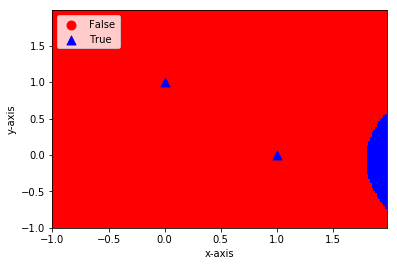

In [22]:
nn = NeuralNetwork([2,2,1])

X = numpy.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])

y = numpy.array([0, 1, 1, 0])

nn.fit(X, y, epochs=20)

print("Final prediction")
for s in X:
    print(s, nn.predict(s))

nn.plot_decision_regions(X, y)